In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('../../src/data/city_growth_models/population-dar es salaam_1950_to_2035.csv')

In [3]:
print(df.isna().sum())

growth        0
growthRate    0
population    0
year          0
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   growth      86 non-null     int64  
 1   growthRate  86 non-null     float64
 2   population  86 non-null     int64  
 3   year        86 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 2.8 KB


In [5]:
df.describe()

,growth,growthRate,population,year
count,86.000000,86.000000,8.600000e+01,86.000000
mean,154645.558140,0.060934,3.188282e+06,1992.500000
std,160804.721683,0.019377,3.632333e+06,24.969982
min,0.000000,0.000000,8.384400e+04,1950.000000
25%,36151.500000,0.046886,4.017530e+05,1971.250000
50%,72631.000000,0.057368,1.642773e+06,1992.500000
75%,258934.500000,0.075375,4.772521e+06,2013.750000
max,547378.000000,0.108869,1.338336e+07,2035.000000


### Outliers

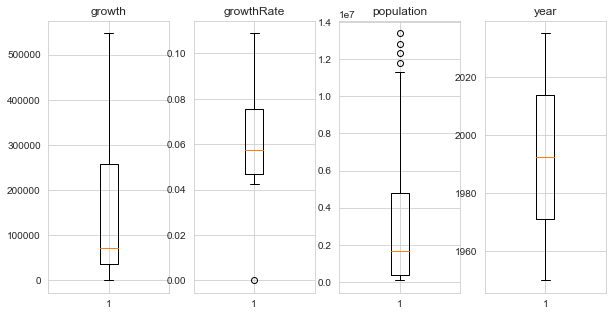

In [6]:
columns = ['growth','growthRate','population','year']
fig, axs = plt.subplots(ncols=len(columns), figsize=(10, 5))
for i, col in enumerate(columns):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)
    
plt.show()

In [7]:
def detect_outliers(dataset, columns):
    df = dataset.copy()
    df[columns] = stats.zscore(df[columns])
    outliers = df[(df[columns] < -3) | (df[columns] > 3)]
    print(f"The number of outliers: {outliers.shape[0]}")
    df = df[(df[columns] > -3) & (df[columns] < 3)].reset_index(drop=True)
    return df

In [8]:
detect_outliers(df,'growth')
detect_outliers(df,'population')
detect_outliers(df,'growthRate')
detect_outliers(df,'year')

The number of outliers: 0
The number of outliers: 0
The number of outliers: 1
The number of outliers: 0


,growth,growthRate,population,year
0,547378,0.042644,13383362,1.712026
1,533494,0.043365,12835984,1.671743
2,519308,0.044072,12302490,1.631460
3,504614,0.044741,11783182,1.591178
4,490045,0.045423,11278568,1.550895
...,...,...,...,...
81,5462,0.051415,111696,-1.550895
82,5188,0.051343,106234,-1.591178
83,8074,0.086843,101046,-1.631460
84,9128,0.108869,92972,-1.671743


In [9]:
df['City'] = 'Dar es salaam'
df['Country'] = 'Tanzania' 
df.rename(columns={'year':'Year' } , inplace=True )
df.rename(columns={'growth':'population_growth' , 'growthRate' : 'population_growth_Rate' } , inplace=True )

In [10]:
df.to_csv('../../task 2 data preprocessing/processedData/population-dar es salaam_1950_to_2035_processed.csv',index=False)
